<a href="https://colab.research.google.com/github/nadeeshafdo/google_colab/blob/main/Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries (Reused from Code Reuse Session 1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Text Cell: Load dataset using code block from Code Reuse Session 1
# Loading the dataset from the provided CSV file path
df = pd.read_csv('/content/5DATA002W.2 Coursework Dataset(25012025v6.0).csv')

In [9]:
# Text Cell: Initial data exploration from Code Reuse Session 1
# Display first few rows to understand the data structure
print("Initial Dataset Preview:")
print(df.head())

# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

Initial Dataset Preview:
  Patient_ID  Month_of_Birth   Age     Sex   Occupation T_Stage N_Stage  \
0      A0012              12  68.0  Female     Teaching      T1      N1   
1      A0013              12  50.0  Female      Medical      T2      N2   
2      A0014              11  58.0  Female  Engineering      T3      N3   
3      A0015               3  58.0  Female   Technology      T1      N1   
4      A0016               1  47.0  Female   Multimedia      T2      N1   

  6th_Stage             Differentiated  Grade   A_Stage  Tumor_Size  \
0       IIA      Poorly differentiated      3  Regional         4.0   
1      IIIA  Moderately differentiated      2  Regional        35.0   
2      IIIC  Moderately differentiated      2  Regional        63.0   
3       IIA      Poorly differentiated      3  Regional        18.0   
4       IIB      Poorly differentiated      3  Regional        41.0   

  Estrogen_Status Progesterone_Status  Regional_Node_Examined  \
0        Positive            Pos

In [10]:
# Text Cell: Descriptive stats from Code Reuse Session 1
# Generate basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Month_of_Birth          Age        Grade   Tumor_Size  \
count     4024.000000  4015.000000  4024.000000  4021.000000   
mean         6.481362    54.107098     2.150596    30.419299   
std          3.475442    11.715528     0.638234    21.161080   
min          1.000000   -50.000000     1.000000   -75.000000   
25%          3.000000    47.000000     2.000000    16.000000   
50%          6.000000    54.000000     2.000000    25.000000   
75%         10.000000    61.000000     3.000000    38.000000   
max         12.000000   502.000000     4.000000   140.000000   

       Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  
count             4023.000000            4024.000000      4024.000000  
mean                14.373602               4.158052        71.472167  
std                  8.129293               5.109331        25.361855  
min                  1.000000               1.000000         1.000000  
25%                  9.000000         

In [11]:
# Text Cell: Variable retention logic adapted from Code Reuse Session 1
# Dropping irrelevant columns for classification and regression tasks
columns_to_drop = ['Patient_ID', 'Month_of_Birth', 'Occupation']  # Identifiers and non-clinical data
df_cleaned = df.drop(columns=columns_to_drop)

# Justification: Patient_ID is a unique identifier, Month_of_Birth and Occupation are not clinically relevant to mortality or survival prediction

In [12]:
# Text Cell: Fixing categorical variables from Code Reuse Session 1
# Convert categorical variables to category type for efficient processing
categorical_cols = ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                   'Grade', 'A_Stage', 'Estrogen_Status', 'Progesterone_Status', 'Mortality_Status']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')

In [13]:
# Text Cell: Check for inconsistencies using code from Code Reuse Session 1
# Verify unique values in key categorical columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df_cleaned[col].unique()}")


Unique Values in Categorical Columns:
Sex: ['Female', '1', NaN]
Categories (2, object): ['1', 'Female']
T_Stage: ['T1', 'T2', 'T3', 'T4']
Categories (4, object): ['T1', 'T2', 'T3', 'T4']
N_Stage: ['N1', 'N2', 'N3']
Categories (3, object): ['N1', 'N2', 'N3']
6th_Stage: ['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB']
Categories (5, object): ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC']
Differentiated: ['Poorly differentiated', 'Moderately differentiated', 'Well differentiated', 'Undifferentiated']
Categories (4, object): ['Moderately differentiated', 'Poorly differentiated', 'Undifferentiated',
                         'Well differentiated']
Grade: [3, 2, 1, 4]
Categories (4, int64): [1, 2, 3, 4]
A_Stage: ['Regional', 'Distant']
Categories (2, object): ['Distant', 'Regional']
Estrogen_Status: ['Positive', 'Negative']
Categories (2, object): ['Negative', 'Positive']
Progesterone_Status: ['Positive', 'Negative']
Categories (2, object): ['Negative', 'Positive']
Mortality_Status: ['Alive', 'Dead', 'ALIVE',

In [14]:
# Text Cell: Handle typos or inconsistencies (example fix)
# Assuming 'Reginol_Node_Positive' is a typo for 'Regional_Node_Positive'
df_cleaned.rename(columns={'Reginol_Node_Positive': 'Regional_Node_Positive'}, inplace=True)

In [15]:
# Text Cell: Data transformation from Code Reuse Session 1
# Encode Mortality_Status for classification (Alive=0, Dead=1)
df_cleaned['Mortality_Status'] = df_cleaned['Mortality_Status'].map({'Alive': 0, 'Dead': 1})

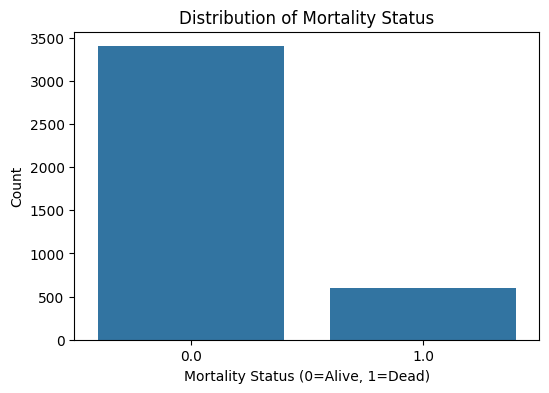

In [16]:
# Text Cell: Plot distribution of target variable from Code Reuse Session 1
# Visualize Mortality_Status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Mortality_Status', data=df_cleaned)
plt.title('Distribution of Mortality Status')
plt.xlabel('Mortality Status (0=Alive, 1=Dead)')
plt.ylabel('Count')
plt.show()

In [17]:
# Text Cell: Prepare datasets for classification and regression
# Classification dataset: All features except Survival_Months (not a predictor for mortality status)
classification_df = df_cleaned.drop(columns=['Survival_Months'])

# Regression dataset: Only Dead patients, drop Mortality_Status (target is Survival_Months)
regression_df = df_cleaned[df_cleaned['Mortality_Status'] == 1].drop(columns=['Mortality_Status'])

In [18]:
# Text Cell: Save prepared datasets using code from Code Reuse Session 1
# Save cleaned datasets for later use
classification_df.to_csv('classification_dataset.csv', index=False)
regression_df.to_csv('regression_dataset.csv', index=False)

# Display shapes of prepared datasets
print("\nClassification Dataset Shape:", classification_df.shape)
print("Regression Dataset Shape:", regression_df.shape)


Classification Dataset Shape: (4024, 14)
Regression Dataset Shape: (598, 14)
